# Principal Component Analysis

## Task

- In the Portland Housing Prices/Sales dataset Jul 2020 - Jul 2021, determine if there is a multicollinearity problem.
- Perform a principal component analysis
- Create a linear model from PCA and compare the model to the previous exercise

# Data loading

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [12]:
data = pd.read_csv ("..\dataset\portland_filtered.csv",  sep=';')

# Analysis
- show data
- solve NaN values
- display basic data statistics
- show correlation matrix

In [13]:
data=data.dropna()
data.head()

,bathrooms,bedrooms,livingArea,age,price
0,3,5,3470,7,1165000
1,4,5,3374,85,1050000
2,3,3,3265,20,442500
3,3,3,3192,36,765000
4,3,4,3157,73,815000


In [14]:
data.describe()

,bathrooms,bedrooms,livingArea,age,price
count,100.000000,100.000000,100.000000,100.00000,1.000000e+02
mean,2.380000,3.260000,1974.080000,49.88000,5.196074e+05
std,0.838228,0.860115,663.629851,32.77973,1.722241e+05
min,1.000000,1.000000,766.000000,3.00000,1.650000e+05
25%,2.000000,3.000000,1530.000000,20.00000,4.125000e+05
50%,2.000000,3.000000,1859.000000,47.50000,5.000000e+05
75%,3.000000,4.000000,2490.250000,75.25000,5.995312e+05
max,5.000000,6.000000,3470.000000,114.00000,1.165000e+06


<Axes: >

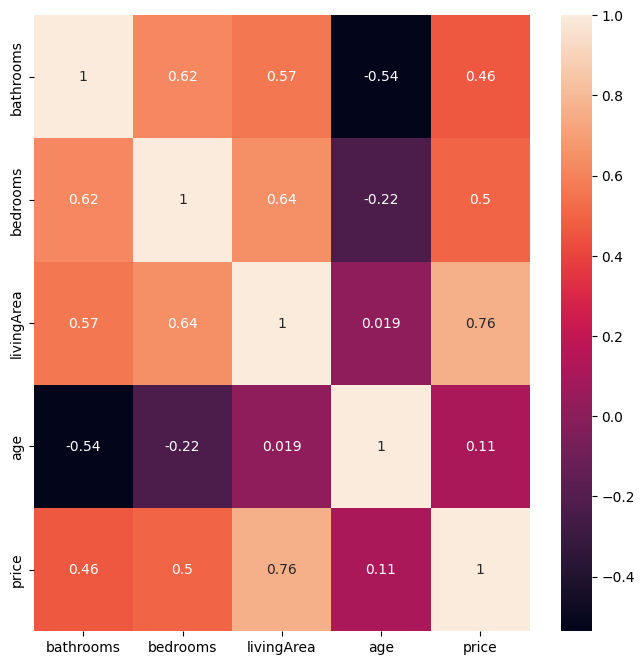

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
sns.heatmap(data.corr(),annot=True)

# Data preparation
- select X variables bathrooms', 'bedrooms', 'livingArea','age','price'
- standardize the variables

In [23]:
# Estandarización (Z-score scaling)
def rescale(X):
    mean = X.mean()
    std = X.std()
    scaled_X = [(i - mean)/std for i in X]
    return pd.Series(scaled_X)

data_std = pd.DataFrame(columns=data.columns)
for i in data.columns:
    data_std[i] = rescale(data[i])

data_std.describe()

,bathrooms,bedrooms,livingArea,age,price
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,1.199041e-16,2.087219e-16,1.110223e-16,-6.217249e-17,9.436896e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.646330e+00,-2.627555e+00,-1.820412e+00,-1.430152e+00,-2.058988e+00
25%,-4.533373e-01,-3.022851e-01,-6.691682e-01,-9.115389e-01,-6.219070e-01
50%,-4.533373e-01,-3.022851e-01,-1.734099e-01,-7.260584e-02,-1.138480e-01
75%,7.396555e-01,8.603500e-01,7.777980e-01,7.739539e-01,4.640692e-01
max,3.125641e+00,3.185620e+00,2.254148e+00,1.956087e+00,3.747400e+00


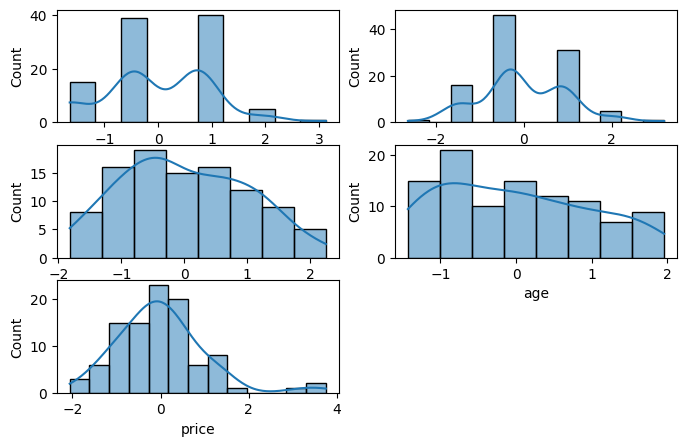

In [24]:
#Visualize the new data
pos = 1
fig = plt.figure(figsize=(8,12))
for i in data_std.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(data_std[i],ax=ax, kde=True)

# Display the VIF for each variable

In [27]:
vifdf = []
for i in data.columns:
    X = np.array(data.drop(i,axis=1))
    y = np.array(data[i])
    lr = LinearRegression()
    lr.fit(X,y)
    y_pred = lr.predict(X)
    r2 = r2_score(y,y_pred)
    vif = 1/(1-r2)
    vifdf.append((i,vif))

vifdf = pd.DataFrame(vifdf,columns=['Features','VIF'])
vifdf.sort_values(by='VIF')

,Features,VIF
3,age,1.930008
1,bedrooms,2.037278
4,price,2.550418
0,bathrooms,2.989507
2,livingArea,3.280001


# PCA
- Perform PCA
- show correlation matrix

In [ ]:
#Perfom PCA
pca = PCA(n_components=4)
X = data_std.drop('price',axis=1)
X_pca = pca.fit_transform(X)

data_std_pca = pd.DataFrame(X_pca,columns=['PCA1','PCA2','PCA3','PCA4'])
data_std_pca['price'] = data_std['price']

<Axes: >

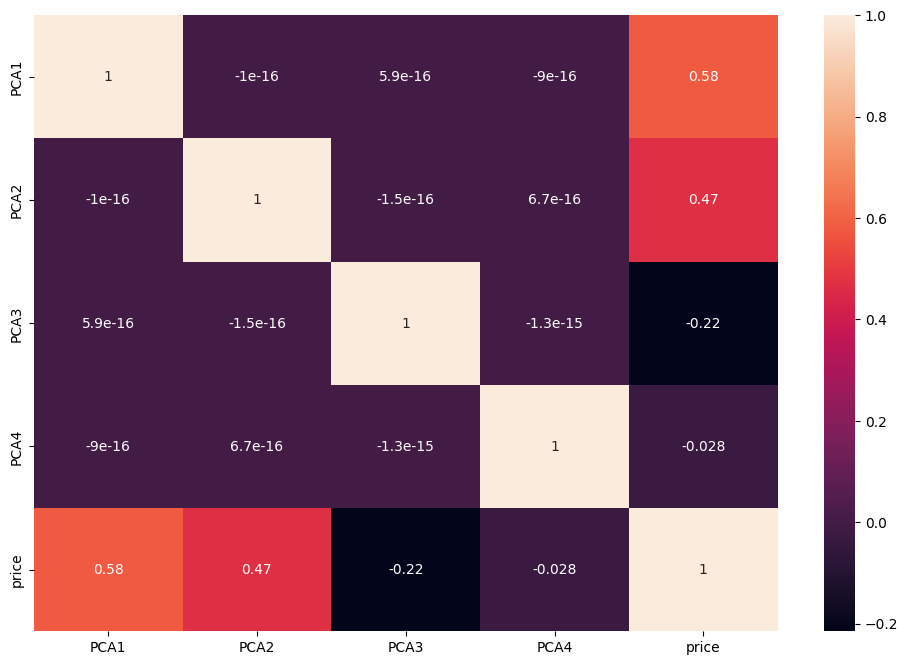

In [32]:
#Show correlation matrix
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
sns.heatmap(data_std_pca.corr(),annot=True)

# Linear model
- Create and train a Linear Model for PCA variables
- Show R2 and RMSE

In [34]:
#Split the data into training and test data and create a linear model 
X = np.array(data_std_pca.drop('price',axis=1))
Y = np.array(data_std_pca['price'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [35]:
#Model validation for training data
Y_pred = lr.predict(X_train)
r2 = r2_score(Y_train, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))

print(f"R2 score: {r2}")
print(f"RMSE: {rmse}")

R2 score: 0.6865550309196036
RMSE: 0.5579641385040055


In [36]:
#Model validation for data data
Y_pred = lr.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(f"R2 score: {r2}")
print(f"RMSE: {rmse}")

R2 score: 0.22785236815536336
RMSE: 0.8677379870579675
